In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 3.7 k近傍法

- ノンパラメトリックモデル
    - 決定木、ランダムフォレスト、カーネルSVM
    - パラメタの数：トレーニングセットの増大に伴う
- パラメトリックモデル
    - パーセプトロン、ロジスティック回帰、線形SVM
        - パラメタの数：固定
    - KNNはさらにサブカテゴリの「インスタンスに基づく学習」をベースとするモデル
        - トレーニングセットを記憶する  <-- データが増えるとつらい。逆にいうと特徴量が少ないと扱いやすい。
        - 学習過程のコストはゼロ <-- 分類処理と学習がセットというイメージかな？
        
- 次元の呪い
    - 高次元空間では近傍であっても距離が離れすぎてしまうため、推定がうまくできない。
    - 詳しい内容は次章でとのこと
    
    
# 3章まとめ

- 意味解釈 --> 決定木
- オンライン学習、分類だけでなく事象の生起確率の予測 --> ロジスティック回帰
- 線形、非線形の解 --> SVM
    - 過学習しやすい。パラメタ調整
- ランダムフォレストは調整すべきパラメタすくなく、過学習もしにくい。実務でも強力。
- KNNはシンプル、トレーニングが不要だが、予測の計算コストはかかる

In [8]:
""" iris dataset の用意 """
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

sc = StandardScaler()

#　トレーニングデータの平均と標準偏差を計算

sc.fit(X_train)

# 平均、標準偏差を用いて標準化

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

""" トレーニングデータとテストデータの特徴量を行方向に結合
"""
X_combined_std = np.vstack((X_train_std, X_test_std))

""" トレーニングデータとテストデータのクラスラベルの結合
"""
y_combined = np.hstack((y_train, y_test))



from matplotlib.colors import ListedColormap

def plot_decision_reqions(X, y, classifier, test_idx=None, resolusion=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolusion),
        np.arange(x2_min, x2_max, resolusion)
    )
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contour(xx1, xx2, z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl
        )
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            x=X_test[:, 0], 
            y=X_test[:, 1], 
            c="gray", alpha=1.0, 
            linewidths=.1, marker='.', s=55, label='test set'
        )

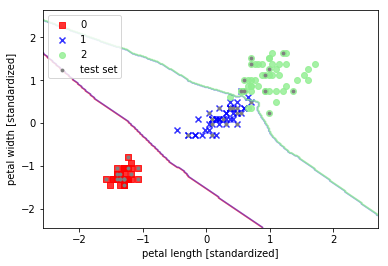

In [9]:
from sklearn.neighbors import KNeighborsClassifier


# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_reqions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="best")
plt.show()